# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [28]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

l = np.arange(27)

df = pd.DataFrame(columns=['año','precio electricidad'], index = l)

df['año'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
df['precio electricidad'] = data
print(df)

    año  precio electricidad
0     1            10.051101
1     2             9.259127
2     3             9.444813
3     4             9.557723
4     5             9.977324
5     6            10.298326
6     7            10.447217
7     8            10.550506
8     9            10.590784
9    10            10.657418
10   11            10.743085
11   12            10.831965
12   13            10.988435
13   14            11.153055
14   15            11.313326
15   16            11.557165
16   17            11.860136
17   18            12.122511
18   19            12.356448
19   20            12.611391
20   21            12.814569
21   22            13.111372
22   23            13.357134
23   24            13.559012
24   25            13.858610
25   26            14.135924
26   27            14.436149


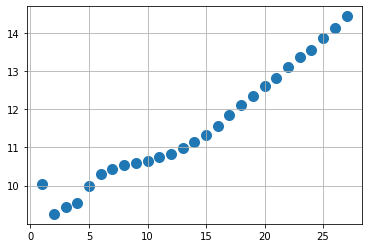

In [32]:
x = df['año']
y = df['precio electricidad']

plt.figure()
plt.scatter(x,y,s = 100)
plt.grid()

In [34]:
import scipy.optimize as opt

def funcion_de_costo_1(theta,x,y):
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
ans = opt.minimize(funcion_de_costo_1,
                   theta_inicial_1,
                   args = (x, y))
costo_1 = ans.fun
resultado_1 = ans.x
ans

      fun: 2.3704889518156507
 hess_inv: array([[ 0.07834722, -0.00427348],
       [-0.00427348,  0.00030525]])
      jac: array([-2.98023224e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([8.92900582, 0.18667055])

In [35]:
def funcion_de_costo_2(theta,x,y):
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
ans = opt.minimize(funcion_de_costo_2,
                   theta_inicial_2,
                   args = (x, y))
costo_2 = ans.fun
resultado_2 = ans.x
ans

      fun: 0.8443845154466336
 hess_inv: array([[ 1.94017081e-01, -2.82051263e-02,  8.54700800e-04],
       [-2.82051263e-02,  5.25662051e-03, -1.76834652e-04],
       [ 8.54700800e-04, -1.76834652e-04,  6.31552332e-06]])
      jac: array([-0.00012314, -0.00089701,  0.03202936])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 196
      nit: 3
     njev: 46
   status: 2
  success: False
        x: array([9.52317503e+00, 6.37380400e-02, 4.39045587e-03])

In [36]:
def funcion_de_costo_3(theta,x,y):
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
ans = opt.minimize(funcion_de_costo_3,
                   theta_inicial_3,
                   args = (x, y))
costo_3 = ans.fun
resultado_3 = ans.x
ans

      fun: 0.8404271065258364
 hess_inv: array([[ 3.96438664e-01, -1.07811006e-01,  7.83475753e-03,
        -1.66191832e-04],
       [-1.07811006e-01,  3.65630418e-02, -2.92186544e-03,
         6.53578769e-05],
       [ 7.83475753e-03, -2.92186544e-03,  2.47007165e-04,
        -5.73075343e-06],
       [-1.66191832e-04,  6.53578769e-05, -5.73075343e-06,
         1.36446512e-07]])
      jac: array([-5.82233816e-03,  5.64677194e-02,  1.18588930e+00,  2.91859416e+01])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 277
      nit: 6
     njev: 53
   status: 2
  success: False
        x: array([9.48297018e+00, 7.91242471e-02, 3.05626811e-03, 3.15823766e-05])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

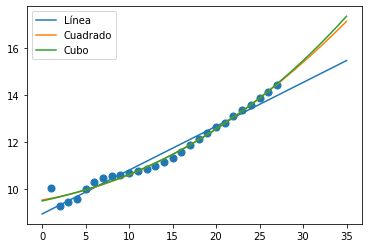

In [39]:
xn = np.linspace(0, 35, 200)
yn1 = resultado_1[0] + resultado_1[1]*xn
yn2 = resultado_2[0] + resultado_2[1]*xn + resultado_2[2]*xn**2
yn3 = resultado_3[0] + resultado_3[1]*xn + resultado_3[2]*xn**2 + resultado_3[3]*xn**3

plt.figure()
plt.scatter(x, y, s=50)
plt.plot(xn, yn1, label="Línea")
plt.plot(xn, yn2, label="Cuadrado")
plt.plot(xn, yn3, label="Cubo")
plt.legend(loc="best")

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [40]:
data = pd.read_csv('population_data.csv')
print(data)

    Year  Poblacion  Nacimientos  Decesos
0   1950      28296      1174947   418430
1   1951      29110      1183788   458238
2   1952      29980      1195209   408823
3   1953      30904      1261775   446127
4   1954      31880      1339837   378752
..   ...        ...          ...      ...
61  2011     115683      2586287   590693
62  2012     117054      2498880   602354
63  2013     118395      2478889   623599
64  2014     119713      2463420   633641
65  2015     121005      2353596   655694

[66 rows x 4 columns]


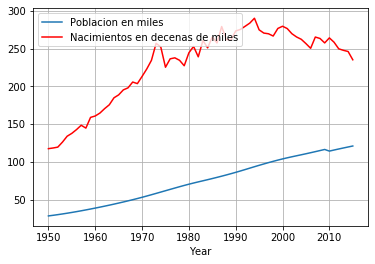

In [4]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

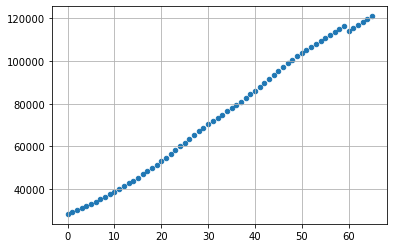

In [51]:
x = data['Year'] - 1950
y = data['Poblacion']

plt.figure()
plt.scatter(x,y,s = 20)
plt.grid()

In [52]:
def funcion_de_poblacion_1(theta,x,y):
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
ans = opt.minimize(funcion_de_poblacion_1,
                   theta_inicial_1,
                   args = (x, y))
costo_1 = ans.fun
resultado_1 = ans.x
ans

      fun: 212137169.54713947
 hess_inv: array([[ 4.96795510e-02, -1.12750407e-03],
       [-1.12750407e-03,  3.08491991e-05]])
      jac: array([ 0., 10.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 155
      nit: 8
     njev: 48
   status: 2
  success: False
        x: array([24138.02806562,  1543.97318521])

In [53]:
def funcion_de_poblacion_2(theta,x,y):
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
ans = opt.minimize(funcion_de_poblacion_2,
                   theta_inicial_2,
                   args = (x, y))
costo_2 = ans.fun
resultado_2 = ans.x
ans

      fun: 210941621.44585627
 hess_inv: array([[ 2.44828301e+01, -1.59883831e+01,  3.12249998e-01],
       [-1.59883831e+01,  1.04411302e+01, -2.03913268e-01],
       [ 3.12249998e-01, -2.03913268e-01,  3.98238920e-03]])
      jac: array([ -2.,  -4., -46.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 274
      nit: 12
     njev: 66
   status: 2
  success: False
        x: array([2.44255939e+04, 1.51701307e+03, 4.14773851e-01])

In [54]:
def funcion_de_poblacion_3(theta,x,y):
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
ans = opt.minimize(funcion_de_poblacion_3,
                   theta_inicial_3,
                   args = (x, y))
costo_3 = ans.fun
resultado_3 = ans.x
ans

      fun: 25240442.633367844
 hess_inv: array([[ 1.53267534e-04,  3.54323734e-06,  1.69589612e-06,
        -3.23099390e-08],
       [ 3.54323734e-06,  1.18053813e-03, -6.79150225e-05,
         8.24406000e-07],
       [ 1.69589612e-06, -6.79150225e-05,  4.07630919e-06,
        -5.04531360e-08],
       [-3.23099390e-08,  8.24406000e-07, -5.04531360e-08,
         6.30496053e-10]])
      jac: array([  -0.75,  -13.25, -332.5 , -205.5 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 271
      nit: 11
     njev: 52
   status: 2
  success: False
        x: array([ 2.84777352e+04,  7.39082513e+02,  3.05647316e+01, -3.09230325e-01])

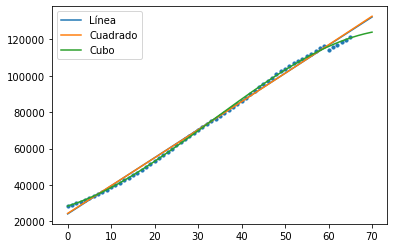

In [70]:
xn = np.linspace(0, 70, 200)
yn1 = resultado_1[0] + resultado_1[1]*xn
yn2 = resultado_2[0] + resultado_2[1]*xn + resultado_2[2]*xn**2
yn3 = resultado_3[0] + resultado_3[1]*xn + resultado_3[2]*xn**2 + resultado_3[3]*xn**3

plt.figure()
plt.scatter(x, y, s=10)
plt.plot(xn, yn1, label="Línea")
plt.plot(xn, yn2, label="Cuadrado")
plt.plot(xn, yn3, label="Cubo")
plt.legend(loc="best")

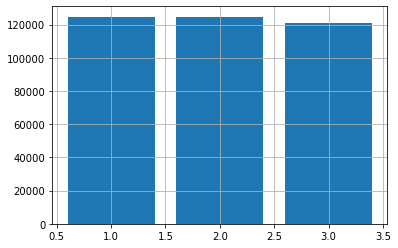

In [71]:
x2015 = 2015 - 1950

pred1 = resultado_1[0] + resultado_1[1]*x2015
pred2 = resultado_2[0] + resultado_2[1]*x2015 + resultado_2[2]*x2015**2
pred3 = resultado_3[0] + resultado_3[1]*x2015 + resultado_3[2]*x2015**2 + resultado_3[3]*x2015**3

plt.figure()
plt.bar([1,2,3], [pred1, pred2, pred3])
plt.grid()

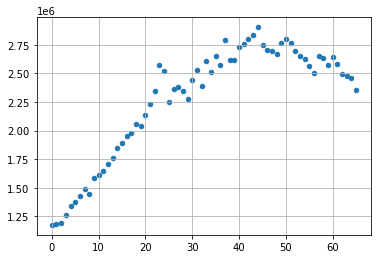

In [83]:
x = data['Year'] - 1950
y = data['Nacimientos']

plt.figure()
plt.scatter(x,y,s = 20)
plt.grid()

In [73]:
def funcion_de_nacimientos_1(theta,x,y):
    prediccion = theta[0] + theta[1]*x
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
ans = opt.minimize(funcion_de_nacimientos_1,
                   theta_inicial_1,
                   args = (x, y))
costo_1 = ans.fun
resultado_1 = ans.x
ans

      fun: 4737912298473.06
 hess_inv: array([[ 1.79389893e-02, -4.18323955e-04],
       [-4.18323955e-04,  1.50896886e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 51
      nit: 8
     njev: 17
   status: 0
  success: True
        x: array([1562946.29586219,   21977.33873051])

In [74]:
def funcion_de_nacimientos_2(theta,x,y):
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
ans = opt.minimize(funcion_de_nacimientos_2,
                   theta_inicial_2,
                   args = (x, y))
costo_2 = ans.fun
resultado_2 = ans.x
ans

      fun: 492921051668.38385
 hess_inv: array([[ 1.68222006e-02, -2.79698043e-10, -6.57223895e-06],
       [-2.79698043e-10,  2.35971243e-11, -3.43891582e-13],
       [-6.57223895e-06, -3.43891582e-13,  4.62899226e-09]])
      jac: array([     0.,      0., -61440.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 191
      nit: 8
     njev: 46
   status: 2
  success: False
        x: array([ 1.02112588e+06,  7.27771487e+04, -7.81554321e+02])

In [75]:
def funcion_de_nacimientos_3(theta,x,y):
    prediccion = theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
ans = opt.minimize(funcion_de_nacimientos_3,
                   theta_inicial_3,
                   args = (x, y))
costo_3 = ans.fun
resultado_3 = ans.x
ans

      fun: 441782319992.3616
 hess_inv: array([[ 1.67968606e-02, -2.80001567e-05, -2.88301758e-05,
         4.15648626e-07],
       [-2.80001567e-05,  1.10472679e-07,  1.13962027e-07,
        -1.88785663e-09],
       [-2.88301758e-05,  1.13962027e-07,  1.17882864e-07,
        -1.95491693e-09],
       [ 4.15648626e-07, -1.88785663e-09, -1.95491693e-09,
         3.34752860e-11]])
      jac: array([0.0000000e+00, 8.1920000e+03, 4.1369600e+05, 2.1782528e+07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 267
      nit: 10
     njev: 52
   status: 2
  success: False
        x: array([ 1.08833751e+06,  5.98704685e+04, -2.81297737e+02, -5.13099351e+00])

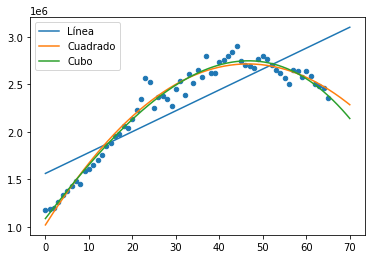

In [81]:
xn = np.linspace(0, 70, 200)
yn1 = resultado_1[0] + resultado_1[1]*xn
yn2 = resultado_2[0] + resultado_2[1]*xn + resultado_2[2]*xn**2
yn3 = resultado_3[0] + resultado_3[1]*xn + resultado_3[2]*xn**2 + resultado_3[3]*xn**3

plt.figure()
plt.scatter(x, y, s=20)
plt.plot(xn, yn1, label="Línea")
plt.plot(xn, yn2, label="Cuadrado")
plt.plot(xn, yn3, label="Cubo")
plt.legend(loc="best")

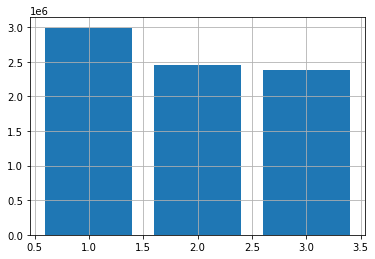

In [84]:
x2015 = 2015 - 1950

pred1 = resultado_1[0] + resultado_1[1]*x2015
pred2 = resultado_2[0] + resultado_2[1]*x2015 + resultado_2[2]*x2015**2
pred3 = resultado_3[0] + resultado_3[1]*x2015 + resultado_3[2]*x2015**2 + resultado_3[3]*x2015**3

plt.figure()
plt.bar([1,2,3], [pred1, pred2, pred3])
plt.grid()